In [1]:
# Import and view the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

GasUsage = pd.read_csv('GasUsage_complete.csv')
#GasUsage

In [2]:
# Convert date to YYYY-MM-DD
GasUsage['Date'] = pd.to_datetime(GasUsage['Date'])
# Remove days with no gas usage
GasUsage = GasUsage[GasUsage['Gas'] > 0]

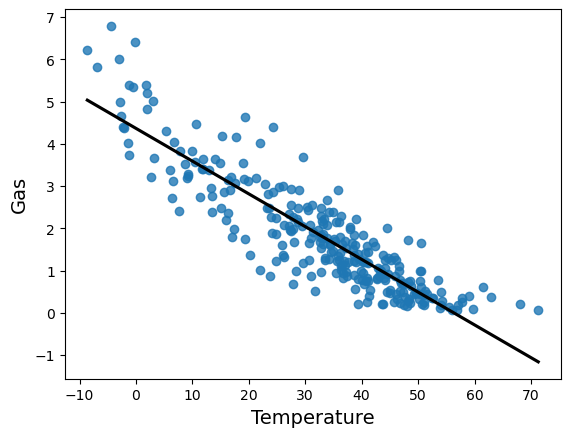

In [3]:
# Scatterplot of gas usage by temperature with regression line
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}
)
p.set_xlabel('Temperature', fontsize=14);
p.set_ylabel('Gas', fontsize=14);

In [4]:
# Fit linear regression model
LinearModel = LinearRegression()
X = GasUsage['Average'].values.reshape(-1, 1)
y = GasUsage['Gas'].values.reshape(-1, 1)

LinearModel = LinearModel.fit(X.reshape(-1, 1), y)

In [ ]:
#Try to understand why the two plots differ

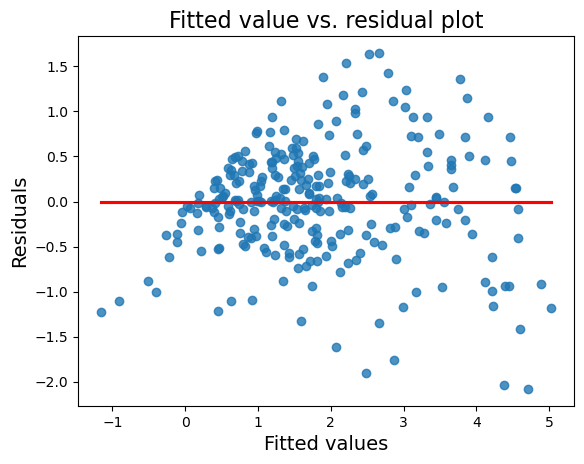

In [5]:
# Fitted value vs. residual plot
p = sns.regplot(
    x=LinearModel.predict(X),
    y=LinearModel.predict(X) - y,
    ci=False,
    line_kws={'color': 'red'},
)
p.set_xlabel('Fitted values', fontsize=14);
p.set_ylabel('Residuals', fontsize=14);
p.set_title('Fitted value vs. residual plot', fontsize=16);

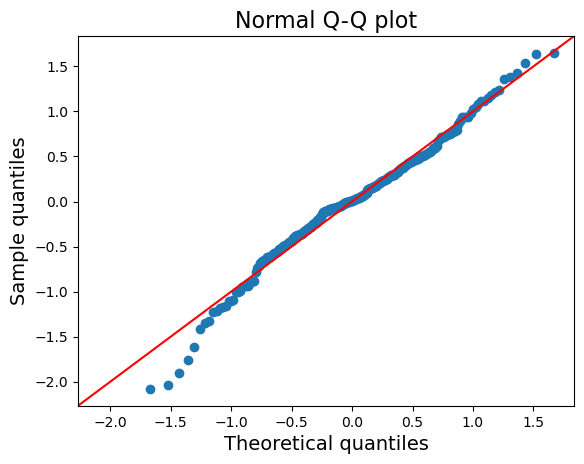

In [6]:
# Normal Q-Q plot
resid = np.ravel(LinearModel.predict(X)) - np.ravel(y)
p = sm.qqplot(resid, line='45', scale=resid.std())

plt.title('Normal Q-Q plot', fontsize=16);
plt.xlabel('Theoretical quantiles', fontsize=14);
plt.ylabel('Sample quantiles', fontsize=14);